https://blog.csdn.net/fengdu78/article/details/121347188
https://blog.csdn.net/qq_73910510/article/details/140687214?spm=1001.2101.3001.6650.9&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromBaidu%7ERate-9-140687214-blog-121347188.235%5Ev43%5Epc_blog_bottom_relevance_base6&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromBaidu%7ERate-9-140687214-blog-121347188.235%5Ev43%5Epc_blog_bottom_relevance_base6&utm_relevant_index=14

ARIMA 模型由自回归（AR）部分、差分（I）部分和移动平均（MA）部分组成 

自回归参数 p 表示模型使用过去多少个观测值来预测当前值

d 的值直接影响到模型对时间序列数据的处理方式。如果 d=0，则表示时间序列本身是平稳的，不需要进行差分操作，模型直接基于原始的平稳序列构建自回归（AR）和移动平均（MA）部分。
当 d > 0时，模型会先对时间序列进行 d 阶差分处理，然后在差分后的平稳序列基础上构建 AR 和 MA 部分。正确确定d的值对于成功构建 ARIMA 模型至关重要，因为只有在平稳的序列上构建 AR 和 MA 部分，才能保证模型参数估计的准确性和预测的有效性

移动平均参数 q 表示模型使用过去多少个残差来预测当前残差。这种参数化的方式使得模型的结构相对直观，易于理解。


例如，在一个ARIMA(1, 0, 1)模型中，自回归部分的阶数 p=1 意味着当前值与前一个观测值有关，移动平均部分的阶数 q=1 表示当前残差与前一个残差有关。

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
china_bank = pd.read_csv(r'D:\workspace\data\time\ChinaBank.csv', index_col='Date', parse_dates=['Date'])
china_bank.head()

,Unnamed: 0,Open,High,Low,Close,Volume
Date,,,,,,
2014-01-02,1,2.62,2.62,2.59,2.61,41632500
2014-01-03,2,2.60,2.61,2.56,2.56,45517700
2014-01-06,3,2.57,2.57,2.50,2.53,68674700
2014-01-07,4,2.51,2.52,2.49,2.52,53293800
2014-01-08,5,2.51,2.54,2.49,2.51,69087900


In [5]:
# 提取 2014年1月到2014年6月的  Close  列的数据
# print(china_bank.index)
# china_bank.index = pd.to_datetime(china_bank.index)
# print(china_bank.index)
sub = china_bank.loc['2014-01':'2014-06','Close']
sub

Date
2014-01-02    2.61
2014-01-03    2.56
2014-01-06    2.53
2014-01-07    2.52
2014-01-08    2.51
              ... 
2014-06-24    2.75
2014-06-25    2.77
2014-06-26    2.77
2014-06-27    2.54
2014-06-30    2.55
Name: Close, Length: 127, dtype: float64

(62,) (65,)


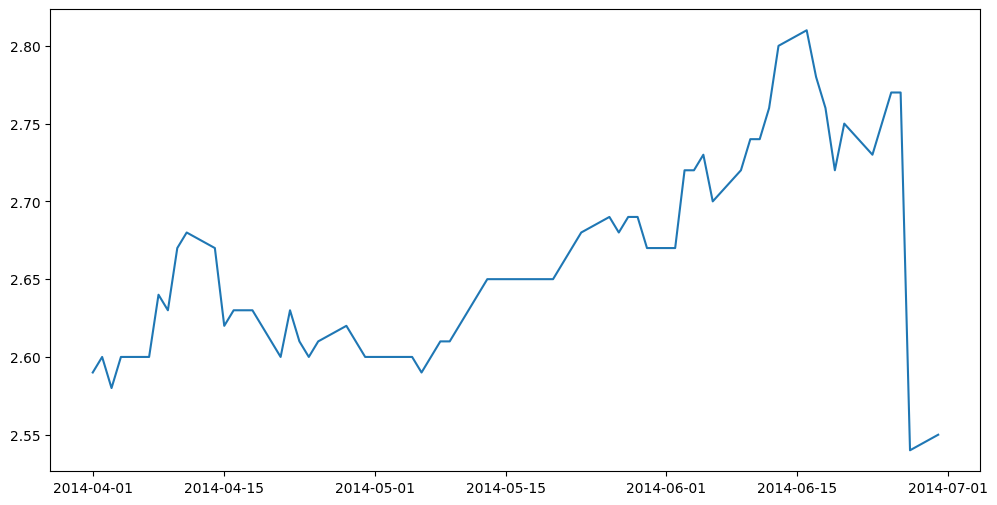

In [6]:
# 划分数据集
train = sub.loc['2014-01': '2014-03']
test = sub.loc['2014-04': '2014-06']

print(train.shape, test.shape)

plt.figure(figsize=(12,6))
plt.plot(test)
# plt.xticks(rotation=45) #旋转45度
plt.show()

In [12]:
#.diff(1)做一个时间间隔
china_bank['diff_1'] = china_bank['Close'].diff(1) #1阶差分
#对一阶差分数据在划分时间间隔
china_bank['diff_2'] = china_bank['diff_1'].diff(1) #2阶差分
china_bank

,Unnamed: 0,Open,High,Low,Close,Volume,diff_1,diff_2
Date,,,,,,,,
2014-01-02,1,2.62,2.62,2.59,2.61,41632500,NaN,NaN
2014-01-03,2,2.60,2.61,2.56,2.56,45517700,-0.05,NaN
2014-01-06,3,2.57,2.57,2.50,2.53,68674700,-0.03,2.000000e-02
2014-01-07,4,2.51,2.52,2.49,2.52,53293800,-0.01,2.000000e-02
2014-01-08,5,2.51,2.54,2.49,2.51,69087900,-0.01,-4.440892e-16
...,...,...,...,...,...,...,...,...
2015-04-24,341,4.71,4.73,4.60,4.66,1619024500,-0.14,-8.000000e-02
2015-04-27,342,4.66,4.82,4.66,4.81,1841766000,0.15,2.900000e-01
2015-04-28,343,4.83,5.29,4.81,5.06,4017962400,0.25,1.000000e-01


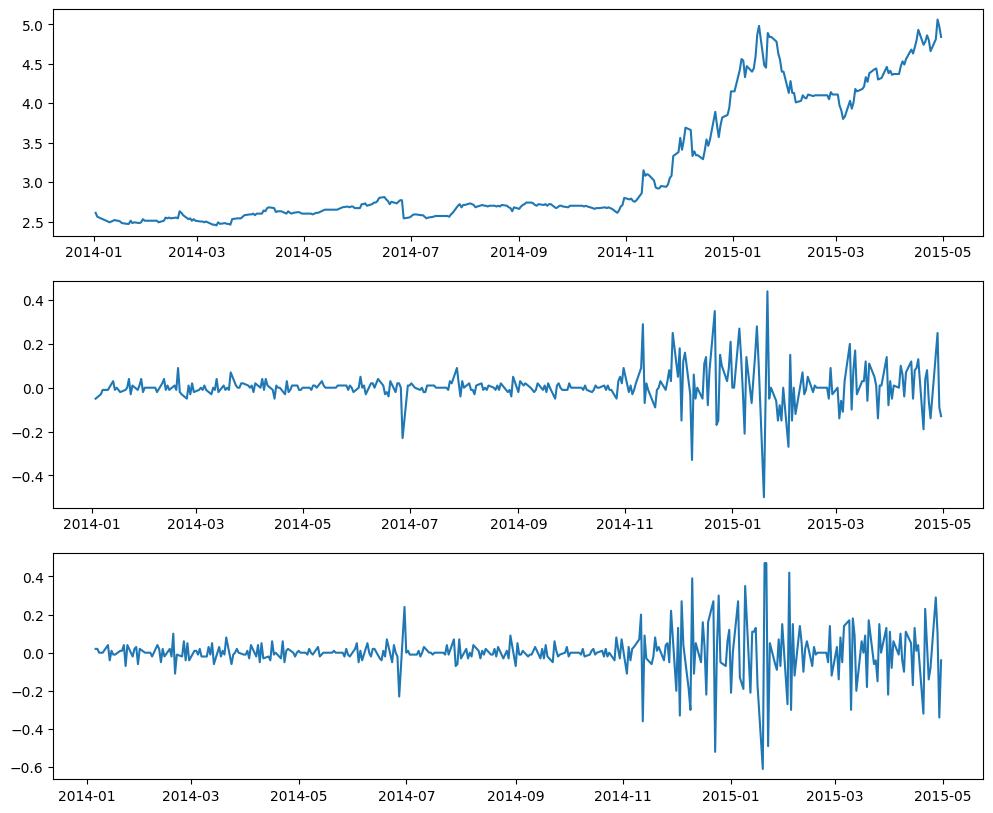

In [8]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(311)
ax1.plot(china_bank['Close'])

ax2 = fig.add_subplot(312)
ax2.plot(china_bank['diff_1'])

ax1 = fig.add_subplot(313)
ax1.plot(china_bank['diff_2'])

plt.show()


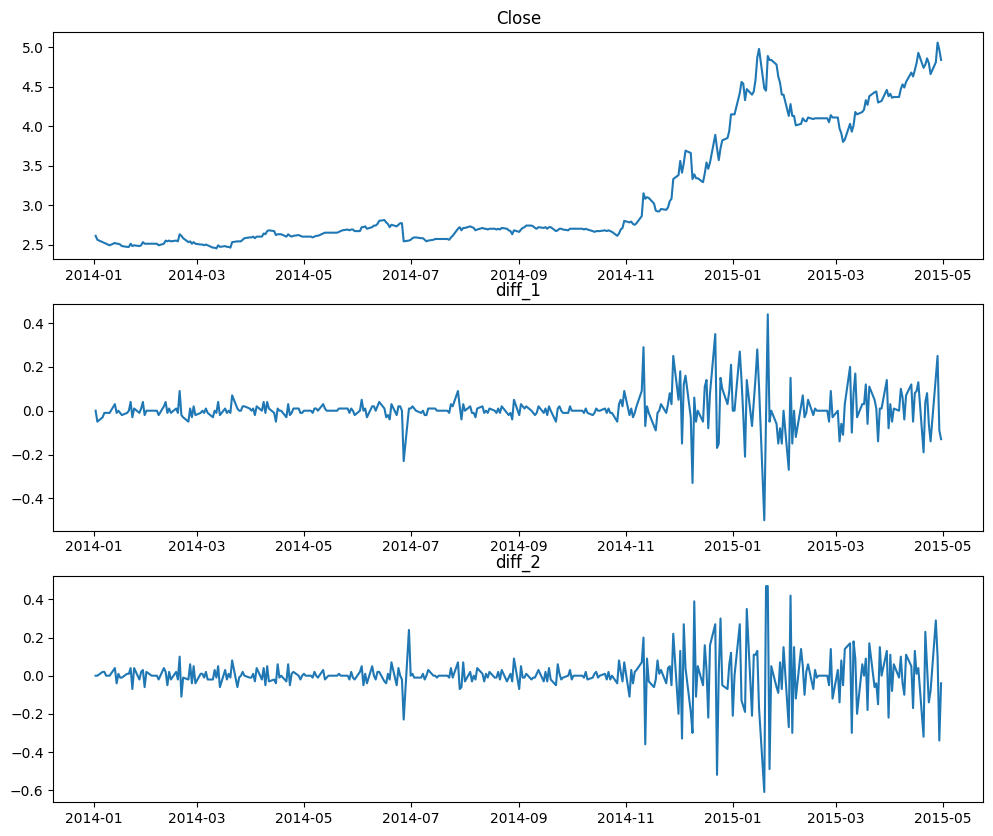

In [41]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12,10))
axs[0].plot(china_bank['Close'])
axs[0].set_title('Close')

axs[1].plot(china_bank['diff_1'])
axs[1].set_title('diff_1')

axs[2].plot(china_bank['diff_2'])
axs[2].set_title('diff_2')

plt.show()

In [18]:
# ADF检验
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF

china_bank['diff_1'] = china_bank['diff_1'].fillna(0)
china_bank['diff_2'] = china_bank['diff_2'].fillna(0)
print(china_bank)


timeseries_adf = ADF(china_bank['Close'].tolist())
timeseries_diff1_adf = ADF(china_bank['diff_1'].tolist())
timeseries_diff2_adf = ADF(china_bank['diff_2'].tolist())

# 打印单位根检验结果
print('timeseries_adf : ', timeseries_adf)
print('timeseries_diff1_adf : ', timeseries_diff1_adf)
print('timeseries_diff2_adf : ', timeseries_diff2_adf)

            Unnamed: 0  Open  High   Low  Close      Volume  diff_1  \
Date                                                                  
2014-01-02           1  2.62  2.62  2.59   2.61    41632500    0.00   
2014-01-03           2  2.60  2.61  2.56   2.56    45517700   -0.05   
2014-01-06           3  2.57  2.57  2.50   2.53    68674700   -0.03   
2014-01-07           4  2.51  2.52  2.49   2.52    53293800   -0.01   
2014-01-08           5  2.51  2.54  2.49   2.51    69087900   -0.01   
...                ...   ...   ...   ...    ...         ...     ...   
2015-04-24         341  4.71  4.73  4.60   4.66  1619024500   -0.14   
2015-04-27         342  4.66  4.82  4.66   4.81  1841766000    0.15   
2015-04-28         343  4.83  5.29  4.81   5.06  4017962400    0.25   
2015-04-29         344  5.00  5.01  4.85   4.97  1872648800   -0.09   
2015-04-30         345  4.96  4.96  4.83   4.84  1471072900   -0.13   

                  diff_2  
Date                      
2014-01-02  0.000000e+

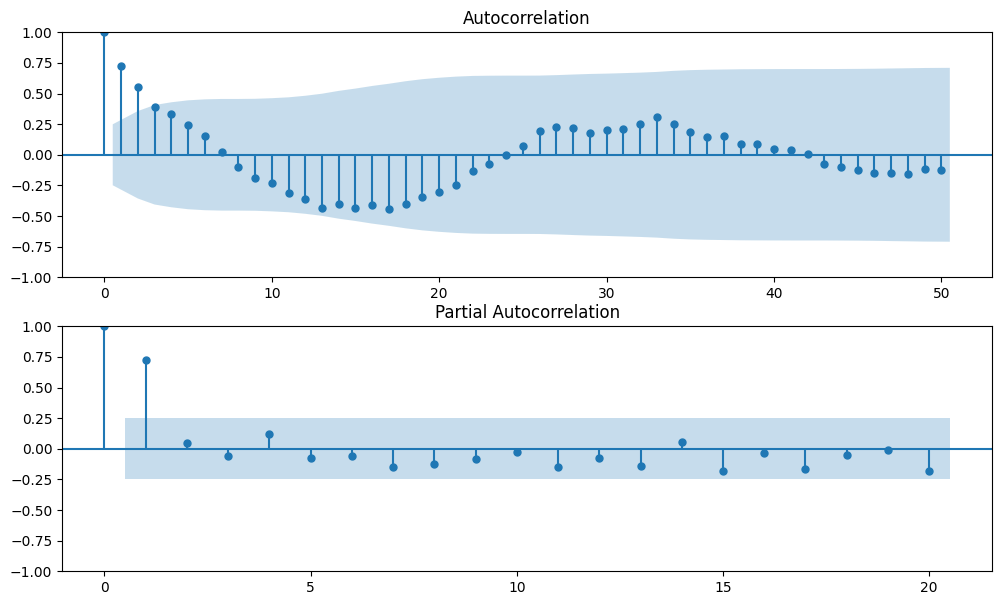

In [27]:
# 确定参数
fig = plt.figure(figsize=(12, 7))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train, lags=50, ax=ax1)
ax1.xaxis.set_ticks_position('bottom')

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')

plt.show()

In [36]:
import itertools
import numpy as np
import seaborn as sns

#确定pq的取值范围
p_min = 0
d_min = 0
q_min = 0
p_max = 5
d_max = 0
q_max = 5

result_bic = pd.DataFrame(index=[f'AR{i}' for i in range(p_min, p_max+1)],
                          columns=[f'MA{i}' for i in range(q_min, q_max+1)])
print(result_bic)
for p, d, q in itertools.product(range(p_min, p_max+1),
                                 range(d_min, d_max+1),
                                 range(q_min, q_max+1),
                                 ):
    if p==0 and d==0 and q==0:
        result_bic.loc[f'AR{p}', f'MA{q}'] = np.nan
        continue
    try:
        model = sm.tsa.ARIMA(train, order=(p, d, q))
        result = model.fit()
        result_bic.loc[f'AR{p}', f'MA{q}'] = result.bic
    except Exception as e:
        continue
result_bic

     MA0  MA1  MA2  MA3  MA4  MA5
AR0  NaN  NaN  NaN  NaN  NaN  NaN
AR1  NaN  NaN  NaN  NaN  NaN  NaN
AR2  NaN  NaN  NaN  NaN  NaN  NaN
AR3  NaN  NaN  NaN  NaN  NaN  NaN
AR4  NaN  NaN  NaN  NaN  NaN  NaN
AR5  NaN  NaN  NaN  NaN  NaN  NaN


c:\ProgramFiles\miniconda3\envs\time\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramFiles\miniconda3\envs\time\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\ProgramFiles\miniconda3\envs\time\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramFiles\miniconda3\envs\time\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.


,MA0,MA1,MA2,MA3,MA4,MA5
AR0,NaN,-245.656321,-263.526431,-261.821299,-262.685194,-258.6142
AR1,-274.893562,-270.800469,-267.689004,-264.563399,-258.673568,-253.343968
AR2,-270.811645,-269.200854,-265.435165,-259.570241,-260.532732,-258.641814
AR3,-267.781626,-265.338276,-260.365862,-257.303892,-261.007063,-261.271846
AR4,-264.968209,-261.358462,-256.994376,-253.197717,-258.074317,-252.258829
AR5,-261.882452,-257.385432,-252.101604,-248.98669,-245.628955,-241.134307


In [37]:
result_bic = result_bic[result_bic.columns].astype(float)
result_bic

,MA0,MA1,MA2,MA3,MA4,MA5
AR0,NaN,-245.656321,-263.526431,-261.821299,-262.685194,-258.614200
AR1,-274.893562,-270.800469,-267.689004,-264.563399,-258.673568,-253.343968
AR2,-270.811645,-269.200854,-265.435165,-259.570241,-260.532732,-258.641814
AR3,-267.781626,-265.338276,-260.365862,-257.303892,-261.007063,-261.271846
AR4,-264.968209,-261.358462,-256.994376,-253.197717,-258.074317,-252.258829
AR5,-261.882452,-257.385432,-252.101604,-248.986690,-245.628955,-241.134307


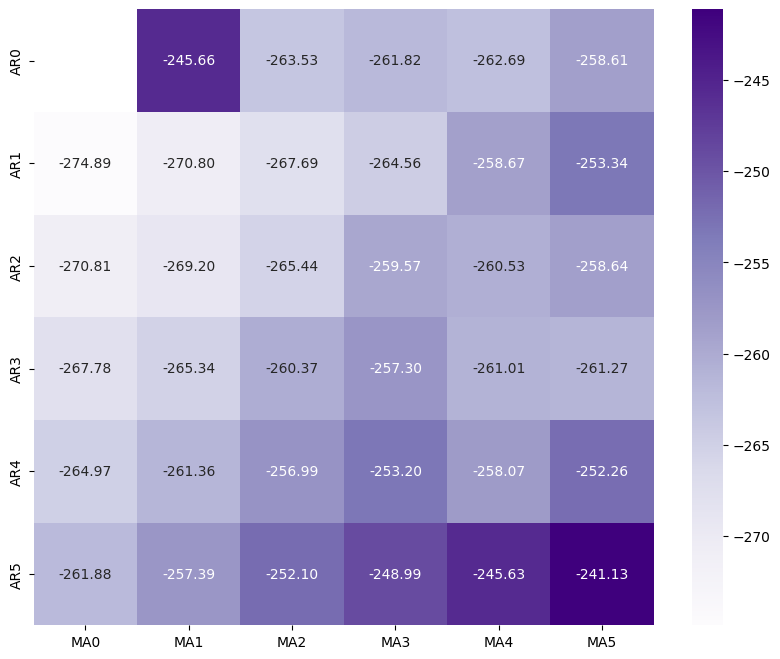

In [46]:
# 绘制热力图
fig, axs = plt.subplots(figsize=(10, 8))
axs = sns.heatmap(result_bic,
                  mask=result_bic.isnull(),
                  ax=axs,
                  annot=True,
                  fmt='.2f',
                  cmap="Purples")
plt.show()

In [49]:
print(result_bic)
print(result_bic.stack())
print(result_bic.stack().idxmin())

            MA0         MA1         MA2         MA3         MA4         MA5
AR0         NaN -245.656321 -263.526431 -261.821299 -262.685194 -258.614200
AR1 -274.893562 -270.800469 -267.689004 -264.563399 -258.673568 -253.343968
AR2 -270.811645 -269.200854 -265.435165 -259.570241 -260.532732 -258.641814
AR3 -267.781626 -265.338276 -260.365862 -257.303892 -261.007063 -261.271846
AR4 -264.968209 -261.358462 -256.994376 -253.197717 -258.074317 -252.258829
AR5 -261.882452 -257.385432 -252.101604 -248.986690 -245.628955 -241.134307
AR0  MA1   -245.656321
     MA2   -263.526431
     MA3   -261.821299
     MA4   -262.685194
     MA5   -258.614200
AR1  MA0   -274.893562
     MA1   -270.800469
     MA2   -267.689004
     MA3   -264.563399
     MA4   -258.673568
     MA5   -253.343968
AR2  MA0   -270.811645
     MA1   -269.200854
     MA2   -265.435165
     MA3   -259.570241
     MA4   -260.532732
     MA5   -258.641814
AR3  MA0   -267.781626
     MA1   -265.338276
     MA2   -260.365862
     MA3

In [52]:
train_results = sm.tsa.arma_order_select_ic(train, ic=['aic', 'bic'], trend='n', max_ar=8, max_ma=8)

print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)



AIC (7, 6)
BIC (7, 6)


c:\ProgramFiles\miniconda3\envs\time\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


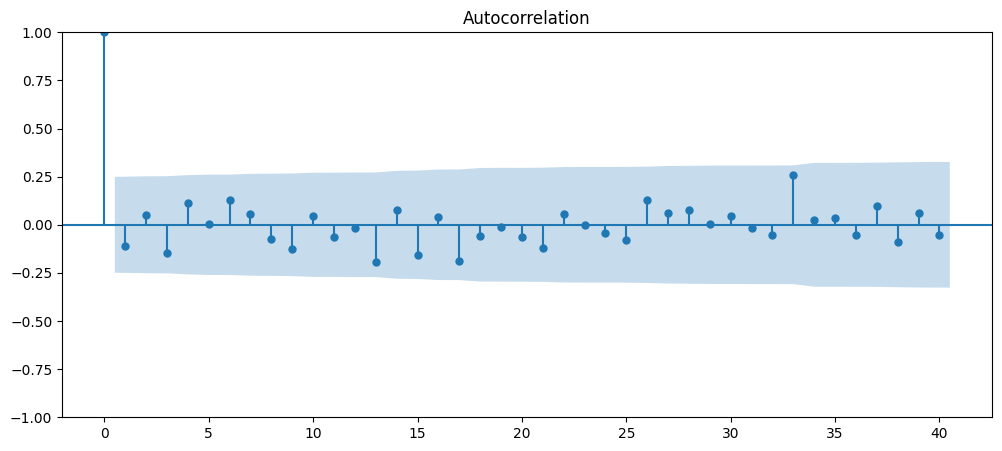

In [53]:
#根据以上求得
p = 1
d = 0
q = 0
model = sm.tsa.ARIMA(train, order=(p,d,q))
results = model.fit()
resid = results.resid #获取残差

fig, ax = plt.subplots(figsize=(12, 5))

ax = sm.graphics.tsa.plot_acf(resid, lags=40,ax=ax)

plt.show()

In [54]:
predict_sunspots = results.predict(dynamic=False)
print(predict_sunspots)

Date
2014-01-02    2.528206
2014-01-03    2.596990
2014-01-06    2.554943
2014-01-07    2.529715
2014-01-08    2.521305
                ...   
2014-03-25    2.538124
2014-03-26    2.538124
2014-03-27    2.538124
2014-03-28    2.554943
2014-03-31    2.571762
Name: predicted_mean, Length: 62, dtype: float64


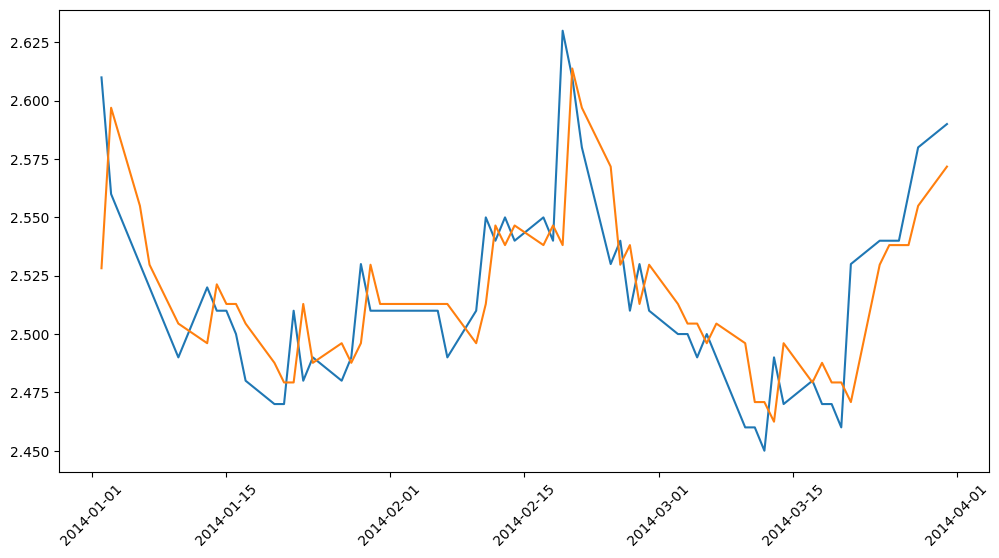

In [55]:
#查看测试集的时间序列与数据(只包含测试集)
plt.figure(figsize=(12,6))
plt.plot(train)
plt.xticks(rotation=45) #旋转45度
plt.plot(predict_sunspots)
plt.show()


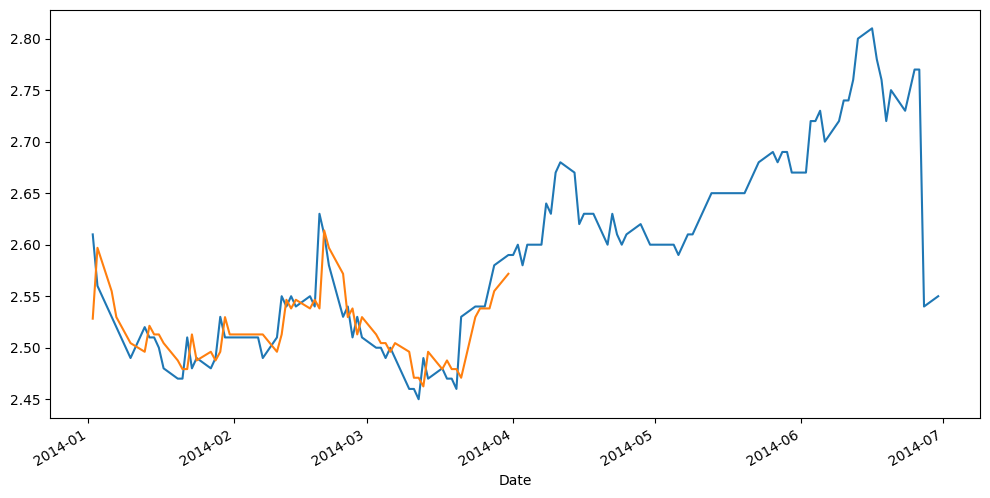

In [56]:
#绘图
fig, ax = plt.subplots(figsize=(12, 6))
ax = sub.plot(ax=ax)
#预测数据
predict_sunspots.plot(ax=ax)
plt.show()
